# Google Cloud setup

the steps you will need to take to use Google Cloud and Vertex AI for your own projects.

**Note**: To try this out yourself, please download this notebook and run it on your local computer.

### Create a Google Cloud Project

Google Cloud projects form the basis for creating, enabling, and using all Google Cloud services including managing APIs, enabling billing, adding and removing collaborators, and managing permissions for Google Cloud resources.

Your usage of Google Cloud tools is always associated with a project.


You will be prompted to create a new project the first time you visit the [Cloud Console](https://console.cloud.google.com)

   > Note that you can create a [free project](https://cloud.google.com/free/docs/gcp-free-tier) which includes a 90-day $300 Free Trial.

Learn more about projects [here.](https://cloud.google.com/resource-manager/docs/creating-managing-projects)

### Set up Billing

A Cloud Billing account is used to define who pays for a given set of resources, and it can be linked to one or more projects. Project usage is charged to the linked Cloud Billing account.

Within your project, you can configure billing by selecting "Billing" in the menu on the left.

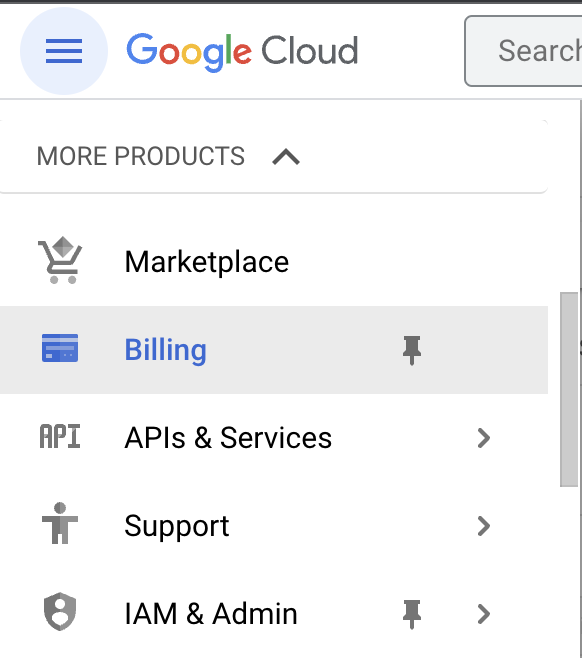



Make sure that **billing is enabled** for your Google Cloud project, [_click here_](https://cloud.google.com/billing/docs/how-to/modify-project) to learn how to confirm that billing is enabled.

### Enable APIs

Once you have a project set up with a billing account, you will need to enable any services you want to use.

[_Click here_](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform,iam,bigquery.googleapis.com)
   to **enable the following APIs** in your Google Cloud project:
   
- _Vertex AI_ 
- _BigQuery_ 
- _IAM_

### Create service account

A service account is a special kind of account typically used by an application or compute workload, such as a Compute Engine instance, rather than a person. A service account is identified by its email address, which is unique to the account. To learn more, check out [this intro video](https://www.youtube.com/watch?v=xXk1YlkKW_k).

You will need to create a service account and give it access to the Google Cloud services you want to use.

#### 1. Go to the [Create Service Account](https://console.cloud.google.com/projectselector/iam-admin/serviceaccounts/create?walkthrough_id=iam--create-service-account&_ga=2.184446630.1022340625.1692280734-338572696.1692280734#step_index=1) page and **select your project**

#### 2. Give the account a name (you can pick anything)

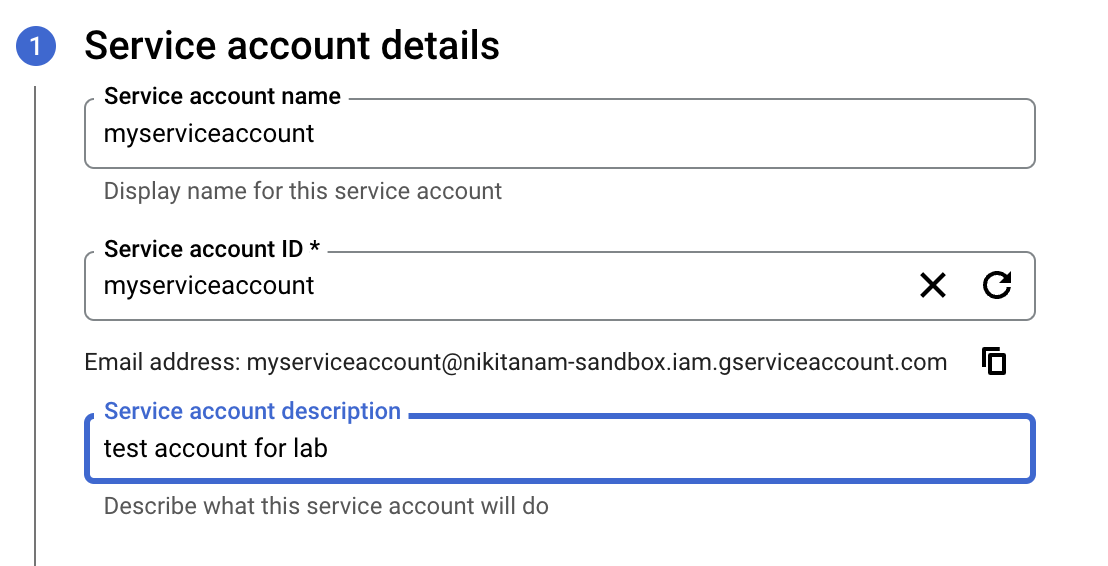

#### Grant the account the following permissions

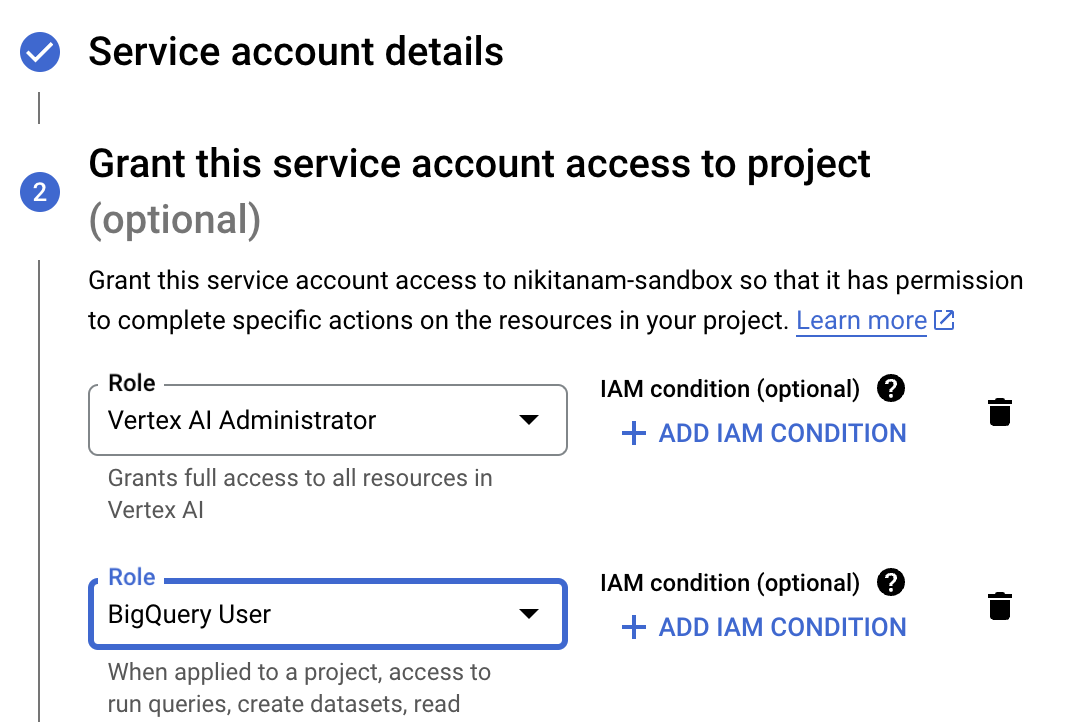

### Create Service Account key

Once you have created your service account, you need to create a key.

#### 1. Select your newly created service account then click. ADD KEY -> create new key.

#### 2. Select JSON key type and click create

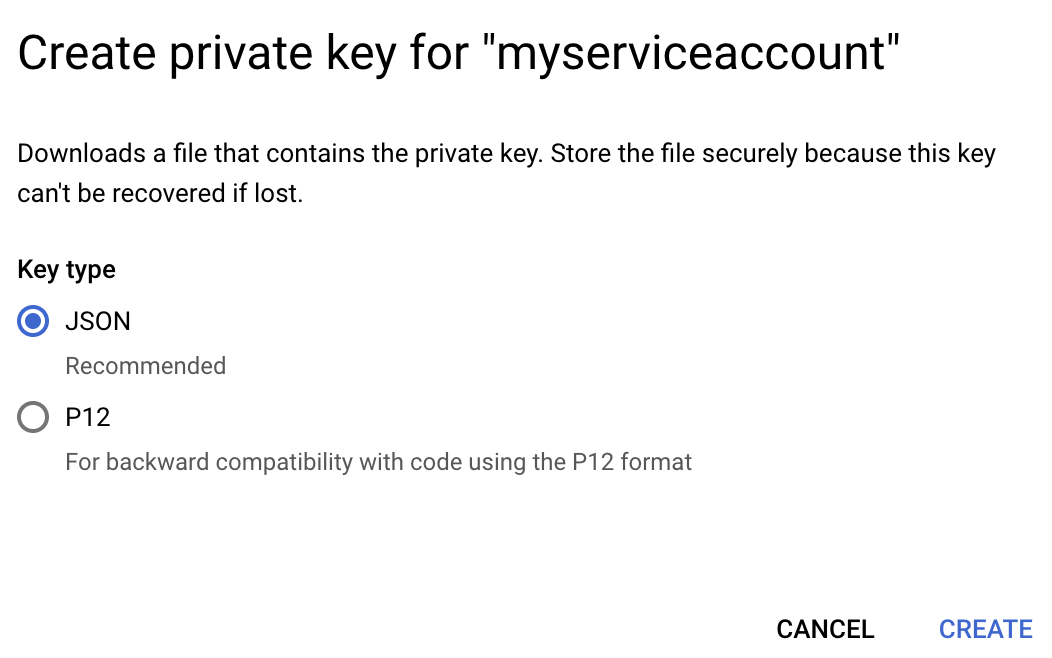


Clicking Create downloads a service account key file. After you download the key file, you cannot download it again.

### Create credentials

To use Vertex AI services, you will need to authenticate with your credentials.

Using the JSON file you just downloaded, you will create a credentials object.

In [3]:
from google.auth.transport.requests import Request
from google.oauth2.service_account import Credentials

In [4]:
# Path to your service account key file
key_path = 'ejemplo-clase-296301-fa6c90425c9f.json' #Path to the JSON key associated with your service account from Google Cloud

In [5]:
# Create credentials object

credentials = Credentials.from_service_account_file(
    key_path,
    scopes=['https://www.googleapis.com/auth/cloud-platform'])

if credentials.expired:
    credentials.refresh(Request())

FileNotFoundError: [Errno 2] No such file or directory: 'ejemplo-clase-296301-fa6c90425c9f.json'

### Set up a Google Cloud Storage Bucket

[Cloud Storage](https://cloud.google.com/storage/docs/buckets) is Google Cloud's object storage. Object storage means you can store images, CSV files, TXT files, and saved model artifacts, Just about anything!

Cloud storage has the concept of a “bucket” which is what holds your data.

Everything you store in Cloud Storage must be contained in a bucket. Within a bucket, you can create folders to organize your data.

Each file in Cloud Storage has a path, just like a file on your local file system. Except that Cloud Storage paths always start with `gs://`

#### Create a new bucket

Click [here](https://console.cloud.google.com/storage/browser) to go to the Cloud Storage section of the Cloud Console or navigate there manually by selecting **Cloud Storage > Buckets** from the hamburger menu in the Cloud Console.

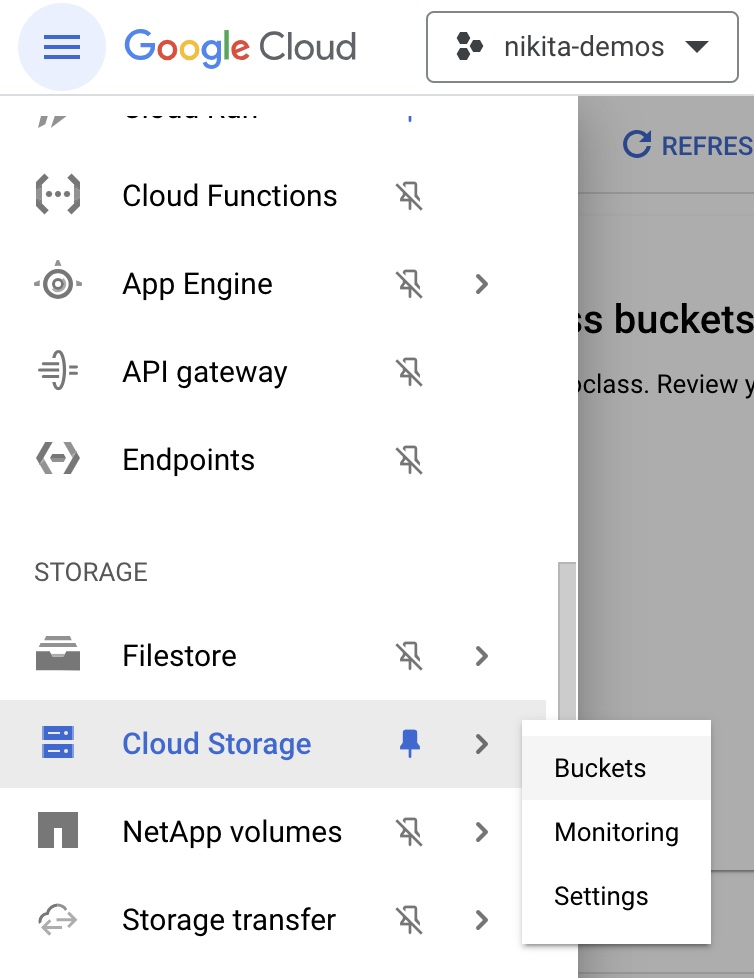

Select **CREATE**

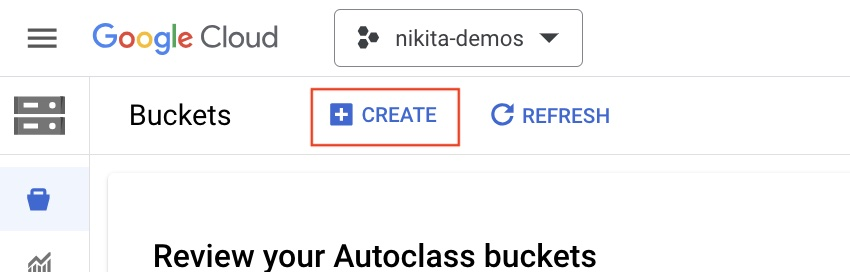

<pre>


</pre>

Give your bucket a **name**, set the **region**, and click **CREATE**.

In general, the best region to select will depend on where you're located as well as the requirements of the service you want to use this data with.

US or EU multiregion are good defaults.

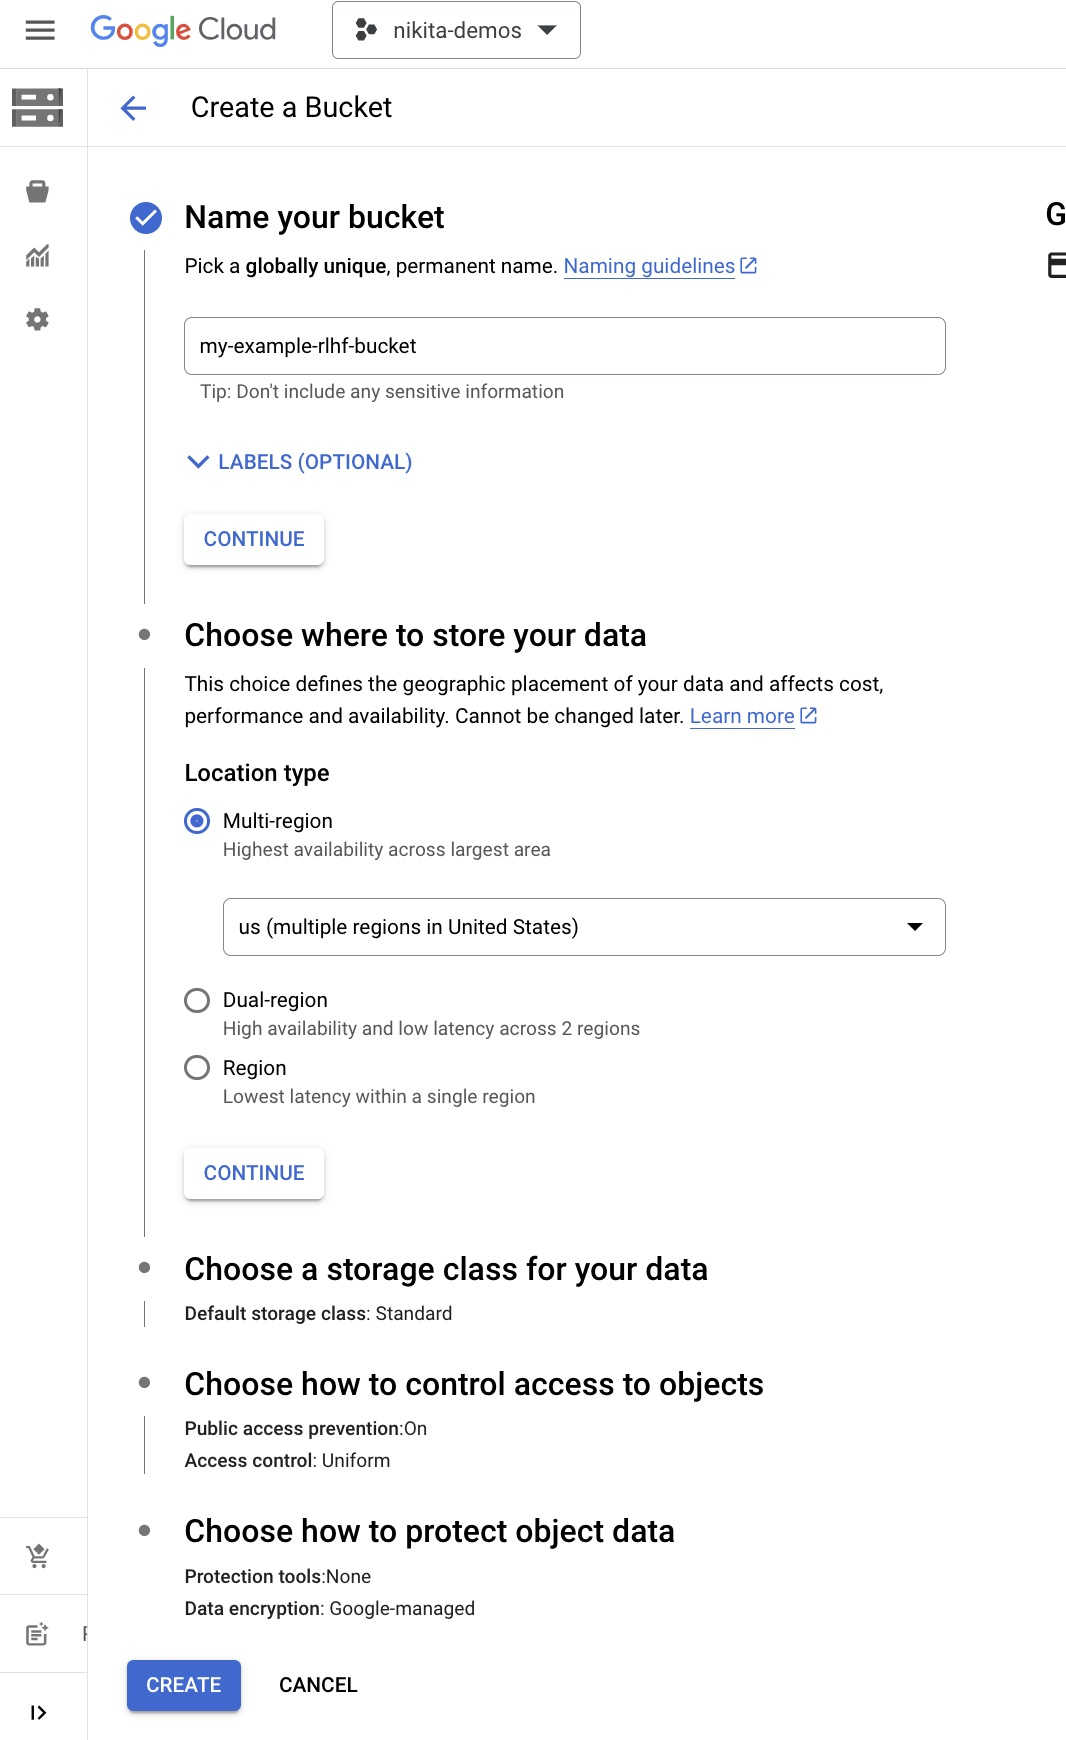

Once you have created your **bucket**, you can upload files or create directories.


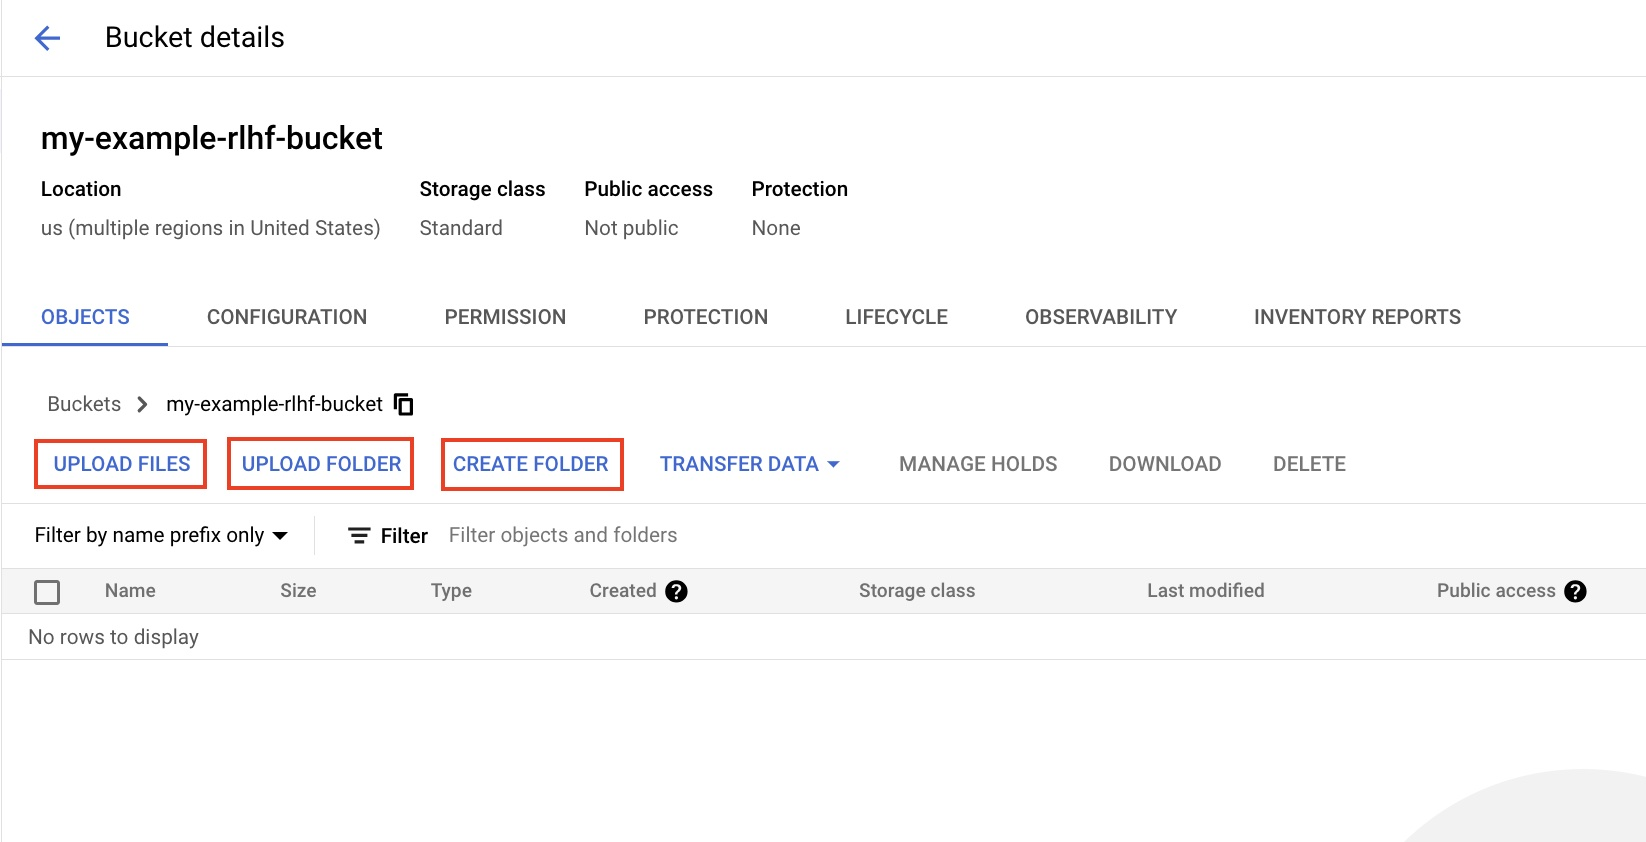



The path to your bucket is `gs://{name_of_your_bucket}`

### Connect to Vertex AI

Once you have a project and your credentials ready, you can use Vertex AI tools.

[**Copy your project ID**](https://cloud.google.com/resource-manager/docs/creating-managing-projects) and paste it in the `PROJECT_ID` field below.

In [6]:
PROJECT_ID = 'ejemplo-clase-296301'
REGION = 'us-central1'

In [7]:
import google.cloud.aiplatform as aiplatform

# Initialize vertex
aiplatform.init(project = PROJECT_ID, location = REGION, credentials = credentials)

NameError: name 'credentials' is not defined